# Trabajando con la API

Auth key: IoYvqZki0ddbZFn8T7nTAWRZVTVxIUGwH0pm7e35

In [5]:
response_API = requests.get('http://api.datosabiertos.enacom.gob.ar/api/v2/resources/?auth_key=IoYvqZki0ddbZFn8T7nTAWRZVTVxIUGwH0pm7e35')
#print(response_API.status_code)
data = response_API.text
parse_json = json.loads(data)
json_formatted_str = json.dumps(parse_json, indent=2)


In [6]:
for i in range(len(parse_json)):
    print(parse_json[i]['description'])

Prestadores de servicios postales
Lista de sanciones por concepto de prestación ilegal de servicios postales. (El valor del porte corresponde al valor del producto carta simple de hasta 20 gr. del Correo Oficial de la República Argentina).
Prestadores de servicios de mensajería
Listado de prestadores con licencias TIC activas
Vehículos utilitarios destinados a la tarea de carga y descarga postal con certificado de libre tránsito y estacionamiento emitido por ENACOM.
Listado de empresas habilitadas para homologacion de equipos
Es la numeración asociada a una zona geográfica en particular.Tiene la siguiente estructura: Indicativo Interurbano + Numero de Abonado
Reclamos de los usuarios de servicios postales por operador postal
Consulta las tecnologías disponibles en tu localidad para acceder al servicio de Internet fijo y móvil
Mapa geolocalizado de las distintas tecnologías disponibles para el acceso a Internet fijo y móvil
Consulta las tecnologías disponibles en tu localidad para acced

# Obteniendo los datos

In [4]:
response = requests.get('http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/PENET-NACIO-DEL-INTER-FIJO/data.ajson/?auth_key=IoYvqZki0ddbZFn8T7nTAWRZVTVxIUGwH0pm7e35')
#print(response_API.status_code)
data = json.loads(response.text)

In [5]:
df_nacional = pd.json_normalize(data, 'result')
df_nacional.columns=df_nacional.iloc[0]
df_nacional = df_nacional.drop(df_nacional.index[0])

In [6]:
df_nacional.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
1,2022,3,76.64,23.95,Jul-Sept 2022
2,2022,2,75.97,23.72,Abr-Jun 2022
3,2022,1,73.88,23.05,Ene-Mar 2022
4,2021,4,73.18,22.81,Oct-Dic 2021
5,2021,3,70.58,21.98,Jul-Sept 2021


In [118]:
response = requests.get('http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/PENET-DEL-INTER-FIJO-51614/data.ajson/?auth_key=IoYvqZki0ddbZFn8T7nTAWRZVTVxIUGwH0pm7e35')
#print(response_API.status_code)
data = json.loads(response.text)

In [119]:
df_provincial = pd.json_normalize(data, 'result')
df_provincial.columns=df_provincial.iloc[0]
df_provincial = df_provincial.drop(df_provincial.index[0])

In [9]:
df_provincial.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
1,2022,3,Buenos Aires,78.11
2,2022,3,Capital Federal,122.28
3,2022,3,Catamarca,65.33
4,2022,3,Chaco,43.86
5,2022,3,Chubut,84.38


In [120]:
def to_datetime(row):
    year = row['Año']
    trimester = int(row['Trimestre'])
    month = (trimester - 1) * 3 + 1
    return pd.to_datetime(f'{year}-{month}-01')

In [11]:
df_provincial.dtypes

0
Año                             object
Trimestre                       object
Provincia                       object
Accesos por cada 100 hogares    object
dtype: object

In [121]:
df_provincial['Accesos por cada 100 hogares'] = df_provincial['Accesos por cada 100 hogares'].astype(float)

In [122]:
df_provincial['datetime'] = df_provincial.apply(to_datetime, axis=1)

In [123]:
df_provincial.set_index('datetime', inplace=True)

In [15]:
df_provincial_bsas = df_provincial[df_provincial['Provincia'] == 'Buenos Aires'].sort_index()

<AxesSubplot:title={'center':'Buenos Aires'}, xlabel='datetime'>

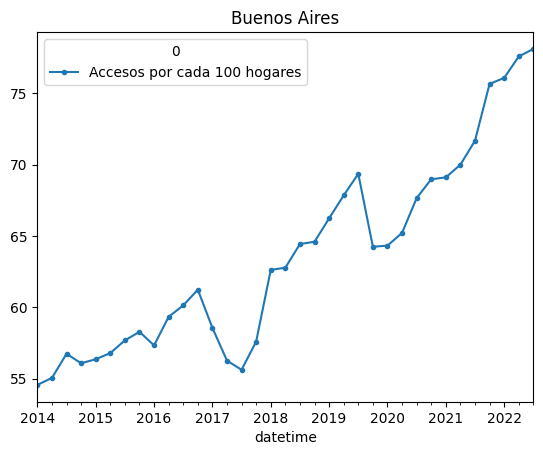

In [16]:
df_provincial_bsas.plot(style='.-', title='Buenos Aires')

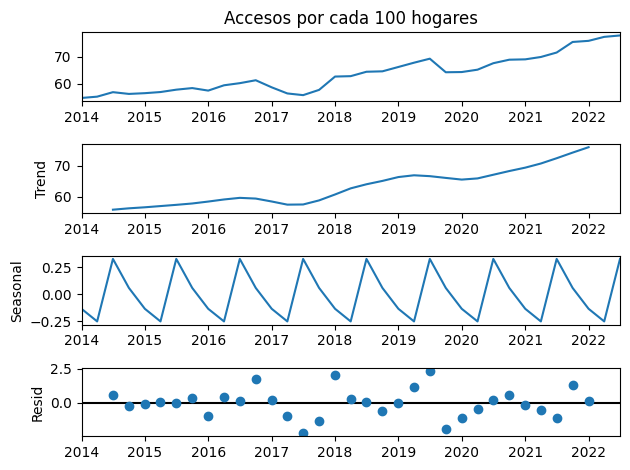

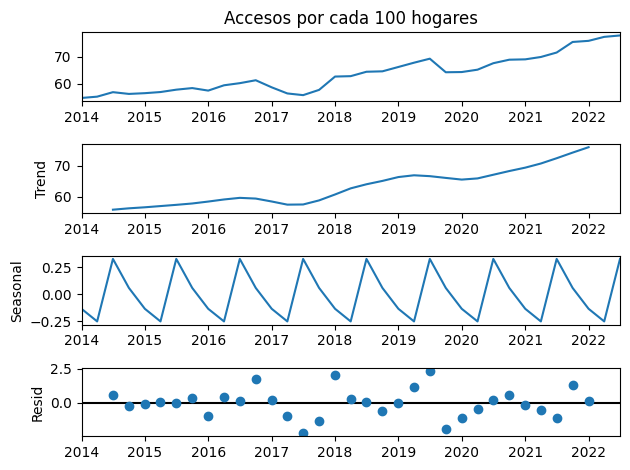

In [17]:
sm.tsa.seasonal_decompose(df_provincial_bsas['Accesos por cada 100 hogares']).plot()

In [124]:
df_provincial

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
datetime,,,,
2022-07-01,2022,3,Buenos Aires,78.11
2022-07-01,2022,3,Capital Federal,122.28
2022-07-01,2022,3,Catamarca,65.33
2022-07-01,2022,3,Chaco,43.86
2022-07-01,2022,3,Chubut,84.38
...,...,...,...,...
2014-01-01,2014,1,Santa Cruz,28.94
2014-01-01,2014,1,Santa Fe,47.85
2014-01-01,2014,1,Santiago Del Estero,16.31


In [126]:
df_provincial['Provincia'] = df_provincial['Provincia'].str.upper()

In [127]:
df_provincial = df_provincial.pivot(columns='Provincia', values='Accesos por cada 100 hogares')

In [129]:
df_provincial.head()

Provincia,BUENOS AIRES,CAPITAL FEDERAL,CATAMARCA,CHACO,CHUBUT,CORRIENTES,CÓRDOBA,ENTRE RÍOS,FORMOSA,JUJUY,...,NEUQUÉN,RÍO NEGRO,SALTA,SAN JUAN,SAN LUIS,SANTA CRUZ,SANTA FE,SANTIAGO DEL ESTERO,TIERRA DEL FUEGO,TUCUMÁN
datetime,,,,,,,,,,,,,,,,,,,,,
2014-01-01,54.57,112.25,24.25,20.72,41.24,22.32,52.52,34.37,17.42,18.42,...,49.79,44.91,28.70,27.60,9.35,28.94,47.85,16.31,63.97,33.42
2014-04-01,55.06,113.14,24.70,20.96,41.41,22.58,53.45,34.69,17.54,18.71,...,50.84,45.33,28.91,27.78,9.72,29.38,48.39,16.70,64.36,33.94
2014-07-01,56.75,113.80,24.71,21.11,40.60,22.79,54.23,34.98,17.77,18.37,...,56.40,46.20,29.22,27.85,9.71,28.23,49.20,16.49,65.69,33.94
2014-10-01,56.09,114.90,25.51,21.87,40.25,23.56,54.70,36.03,17.96,19.60,...,52.55,45.48,29.53,28.04,9.79,27.80,50.00,17.27,66.14,35.32
2015-01-01,56.37,114.90,25.11,26.65,37.61,28.95,54.70,42.07,18.12,19.69,...,51.95,45.33,30.01,27.55,9.72,27.99,50.24,17.06,74.23,35.08


In [138]:
accented_chars = 'áéíóúüñÁÉÍÓÚÜÑ'
unaccented_chars = 'aeiouunAEIOUUN'
char_map = str.maketrans(accented_chars, unaccented_chars)
df_provincial = df_provincial.rename(columns=lambda x: x.translate(char_map))
df_provincial.columns


Index(['BUENOS AIRES', 'CAPITAL FEDERAL', 'CATAMARCA', 'CHACO', 'CHUBUT',
       'CORRIENTES', 'CORDOBA', 'ENTRE RIOS', 'FORMOSA', 'JUJUY', 'LA PAMPA',
       'LA RIOJA', 'MENDOZA', 'MISIONES', 'NEUQUEN', 'RIO NEGRO', 'SALTA',
       'SAN JUAN', 'SAN LUIS', 'SANTA CRUZ', 'SANTA FE', 'SANTIAGO DEL ESTERO',
       'TIERRA DEL FUEGO', 'TUCUMAN'],
      dtype='object', name='Provincia')

In [142]:
pbg['BUENOS AIRES']

datetime
2014-01-01    2.139721e+08
2015-01-01    2.155238e+08
2016-01-01    2.101493e+08
2017-01-01    2.140955e+08
2018-01-01    2.058124e+08
2019-01-01    2.027134e+08
2020-01-01    1.831086e+08
2021-01-01    2.033441e+08
Name: BUENOS AIRES, dtype: float64

In [143]:
df_provincial['BUENOS AIRES']

datetime
2014-01-01    54.57
2014-04-01    55.06
2014-07-01    56.75
2014-10-01    56.09
2015-01-01    56.37
2015-04-01    56.80
2015-07-01    57.69
2015-10-01    58.29
2016-01-01    57.34
2016-04-01    59.34
2016-07-01    60.14
2016-10-01    61.24
2017-01-01    58.57
2017-04-01    56.27
2017-07-01    55.63
2017-10-01    57.61
2018-01-01    62.63
2018-04-01    62.78
2018-07-01    64.44
2018-10-01    64.60
2019-01-01    66.24
2019-04-01    67.85
2019-07-01    69.36
2019-10-01    64.25
2020-01-01    64.33
2020-04-01    65.22
2020-07-01    67.66
2020-10-01    68.98
2021-01-01    69.11
2021-04-01    70.00
2021-07-01    71.68
2021-10-01    75.66
2022-01-01    76.08
2022-04-01    77.58
2022-07-01    78.11
Name: BUENOS AIRES, dtype: float64

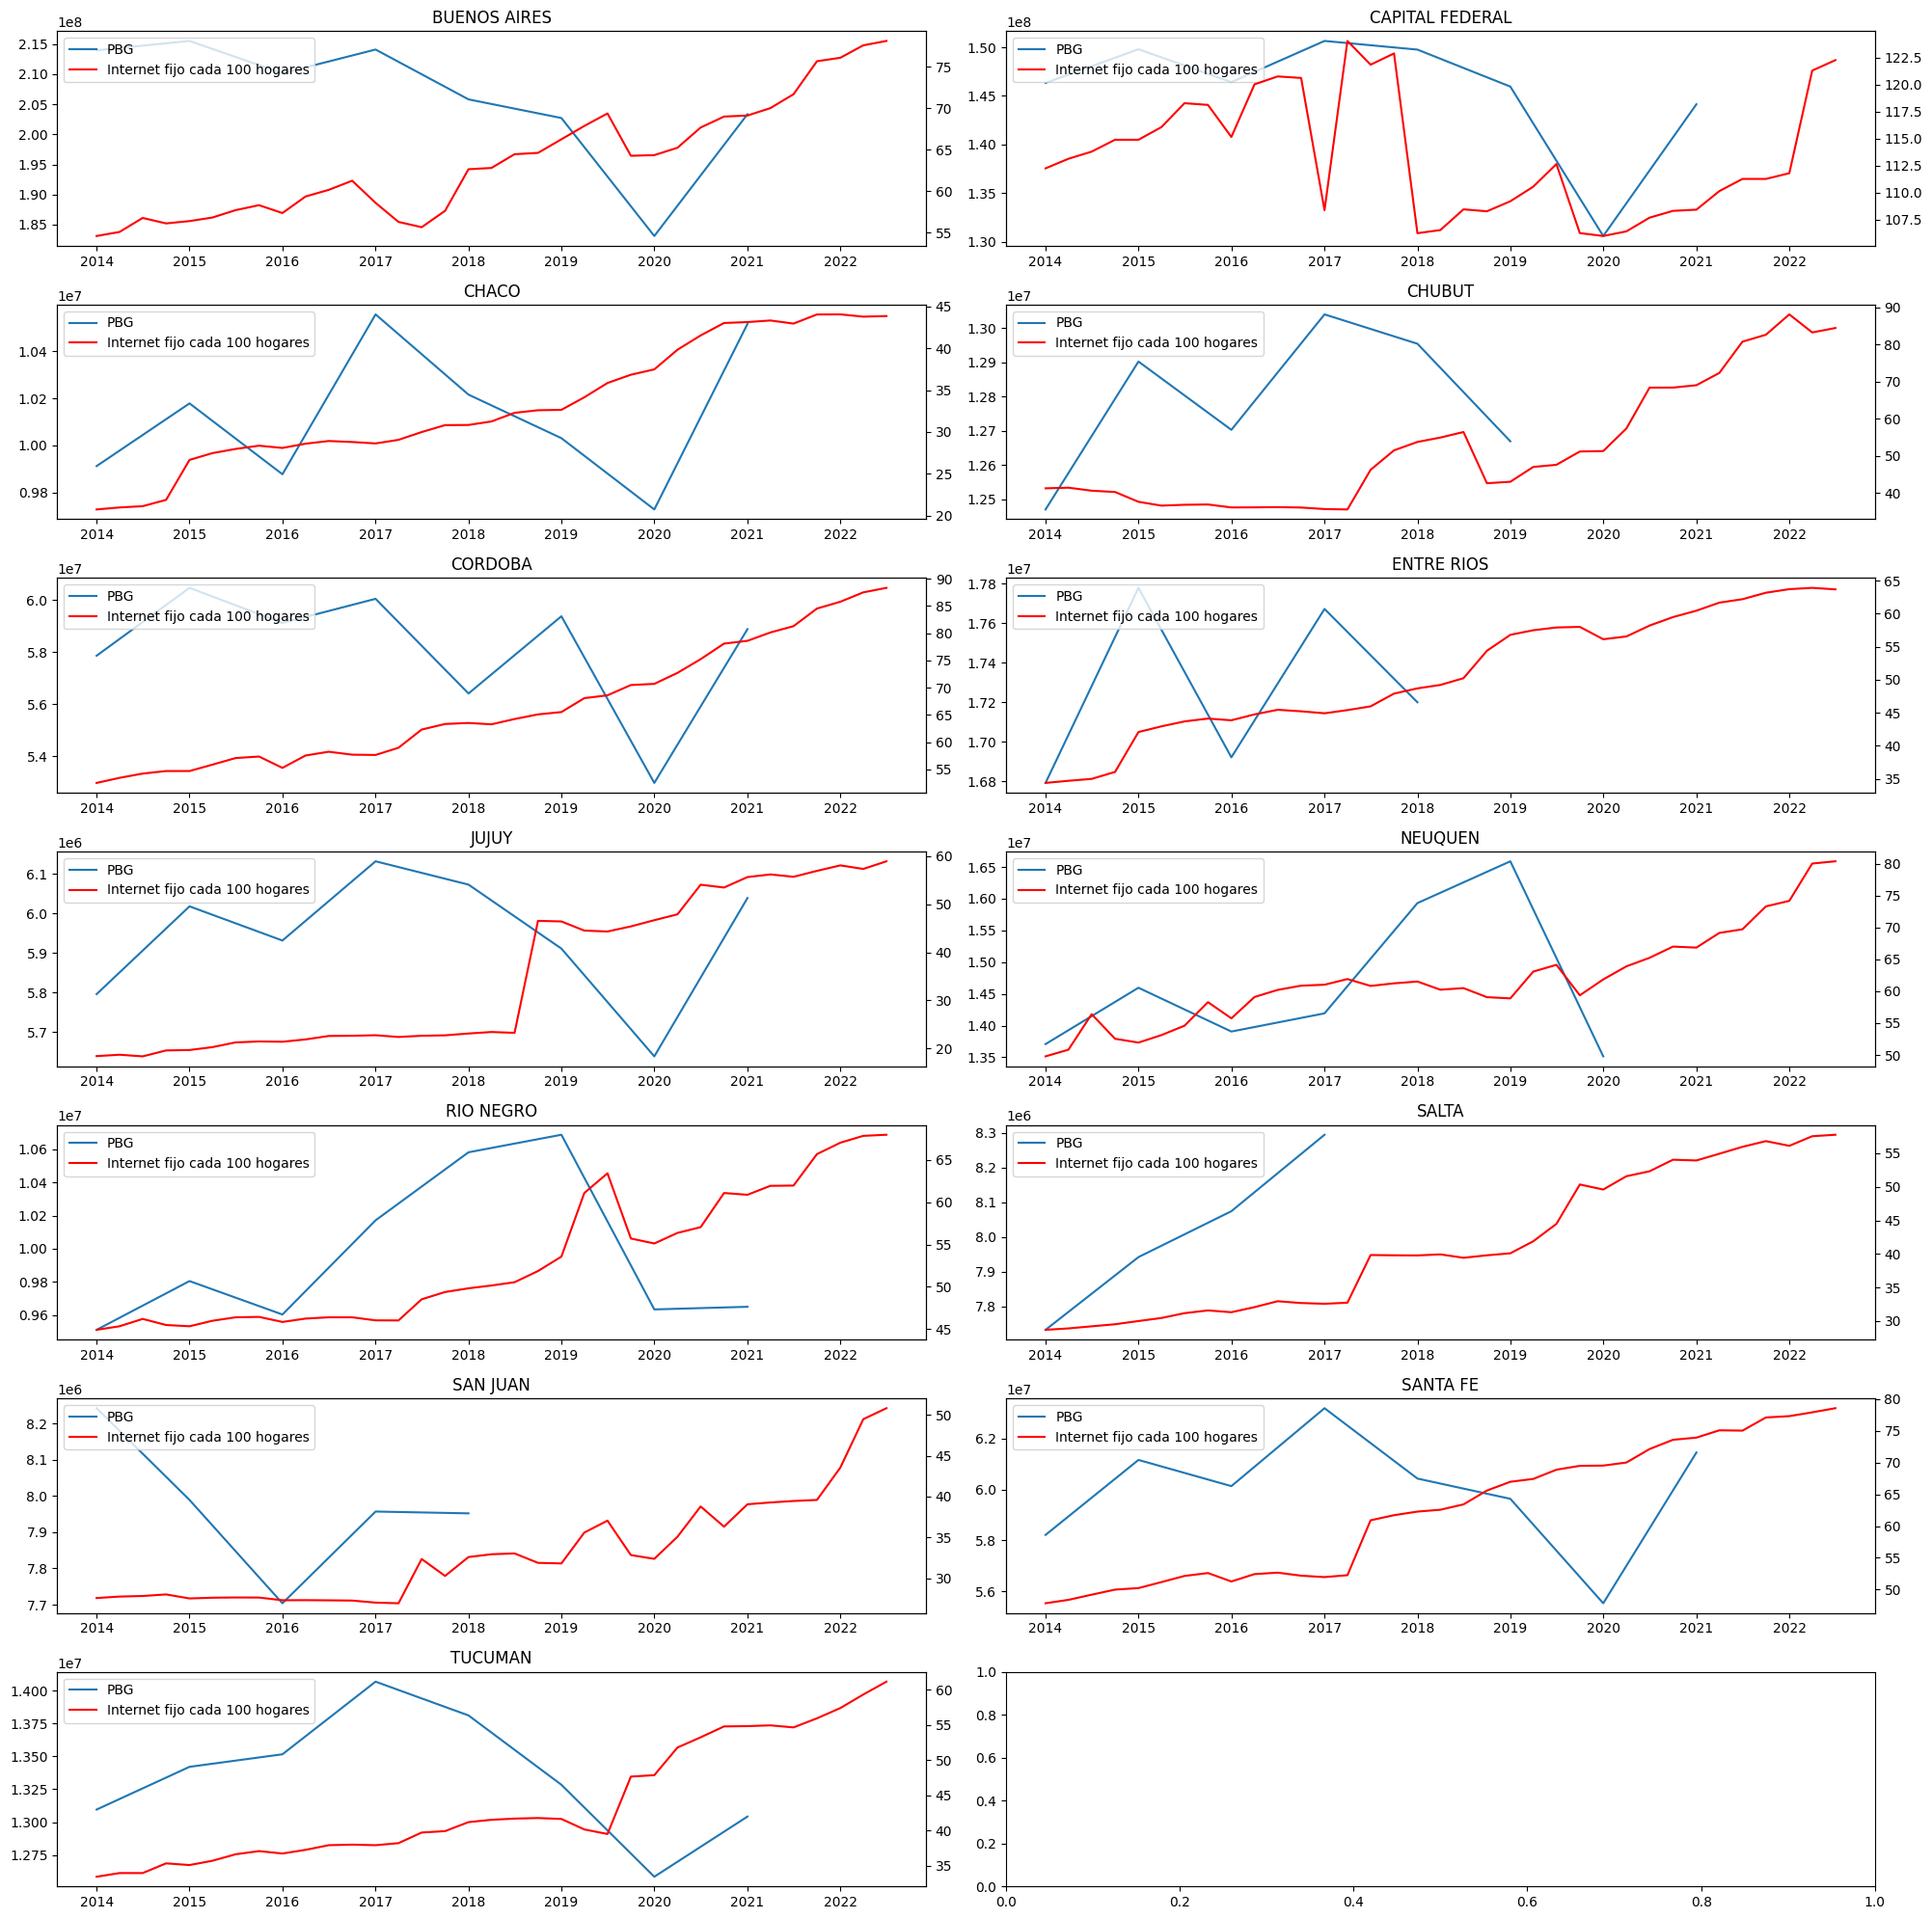

In [156]:
import math

num_cols = 2  # Numero de columnas en el grid
num_rows = math.ceil(len(pbg.columns) / num_cols)  # Numero de filas en el grid

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20,20))
for i, col in enumerate(pbg.columns):
    ax = axs[i // num_cols, i % num_cols]
    line1, = ax.plot(pbg[col], label='PBG')
    ax2 = ax.twinx()
    line2, = ax2.plot(df_provincial[col], label='Internet fijo cada 100 hogares', color='red')
    ax.legend(handles=[line1, line2], labels=[line1.get_label(), line2.get_label()], loc='upper left')
    ax.set_title(col)

plt.tight_layout()
plt.show()

In [181]:
df_provincial_anual = df_provincial.resample('AS').first()['2014':'2021']

In [182]:
df_provincial_anual

Provincia,BUENOS AIRES,CAPITAL FEDERAL,CATAMARCA,CHACO,CHUBUT,CORRIENTES,CORDOBA,ENTRE RIOS,FORMOSA,JUJUY,...,NEUQUEN,RIO NEGRO,SALTA,SAN JUAN,SAN LUIS,SANTA CRUZ,SANTA FE,SANTIAGO DEL ESTERO,TIERRA DEL FUEGO,TUCUMAN
datetime,,,,,,,,,,,,,,,,,,,,,
2014-01-01,54.57,112.25,24.25,20.72,41.24,22.32,52.52,34.37,17.42,18.42,...,49.79,44.91,28.70,27.60,9.35,28.94,47.85,16.31,63.97,33.42
2015-01-01,56.37,114.90,25.11,26.65,37.61,28.95,54.70,42.07,18.12,19.69,...,51.95,45.33,30.01,27.55,9.72,27.99,50.24,17.06,74.23,35.08
2016-01-01,57.34,115.16,25.91,28.08,36.09,30.08,55.28,43.85,19.04,21.41,...,55.75,45.84,31.32,27.33,9.59,26.87,51.28,16.21,65.83,36.72
2017-01-01,58.57,108.37,25.66,28.62,35.66,30.94,57.65,44.91,19.84,22.76,...,61.02,46.03,32.58,27.04,9.55,26.52,51.97,14.70,68.92,37.90
2018-01-01,62.63,106.24,32.79,30.83,53.72,32.66,63.52,48.68,21.40,23.12,...,61.52,49.82,39.78,32.61,15.15,33.55,62.28,34.99,65.20,41.18
2019-01-01,66.24,109.20,32.19,32.64,43.00,35.13,65.52,56.79,29.68,46.41,...,58.88,53.57,40.10,31.83,67.34,23.67,66.97,37.52,93.38,41.63
2020-01-01,64.33,105.98,37.62,37.48,51.27,38.73,70.69,56.12,30.23,46.67,...,61.85,55.12,49.60,32.39,76.31,35.97,69.52,42.47,76.07,47.85
2021-01-01,69.11,108.42,48.90,43.14,68.99,42.66,78.59,60.44,32.73,55.63,...,66.84,60.88,53.93,39.06,81.24,41.65,73.92,45.67,77.35,54.82


In [174]:
pbg.dropna(axis=1, how='any', inplace=True)

In [186]:
pbg

,BUENOS AIRES,CAPITAL FEDERAL,CHACO,CORDOBA,JUJUY,RIO NEGRO,SANTA FE,TUCUMAN
datetime,,,,,,,,
2014-01-01,2.139721e+08,1.463378e+08,9.912447e+06,5.786225e+07,5.795778e+06,9.511339e+06,5.821698e+07,1.309563e+07
2015-01-01,2.155238e+08,1.498046e+08,1.017839e+07,6.047268e+07,6.017717e+06,9.805172e+06,6.115717e+07,1.342110e+07
2016-01-01,2.101493e+08,1.464225e+08,9.877740e+06,5.912249e+07,5.931295e+06,9.603665e+06,6.012978e+07,1.351656e+07
2017-01-01,2.140955e+08,1.506592e+08,1.055592e+07,6.005072e+07,6.131640e+06,1.017138e+07,6.318639e+07,1.406972e+07
2018-01-01,2.058124e+08,1.497672e+08,1.021560e+07,5.640985e+07,6.072701e+06,1.058136e+07,6.042692e+07,1.381259e+07
2019-01-01,2.027134e+08,1.459611e+08,1.003081e+07,5.938010e+07,5.910886e+06,1.068708e+07,5.963219e+07,1.328452e+07
2020-01-01,1.831086e+08,1.305884e+08,9.728430e+06,5.297062e+07,5.638358e+06,9.634335e+06,5.553515e+07,1.258411e+07
2021-01-01,2.033441e+08,1.441462e+08,1.051545e+07,5.888392e+07,6.038750e+06,9.650170e+06,6.144832e+07,1.304226e+07


In [189]:
df_provincial_anual['BUENOS AIRES']

datetime
2014-01-01    54.57
2015-01-01    56.37
2016-01-01    57.34
2017-01-01    58.57
2018-01-01    62.63
2019-01-01    66.24
2020-01-01    64.33
2021-01-01    69.11
Freq: AS-JAN, Name: BUENOS AIRES, dtype: float64

In [192]:
from scipy.stats import spearmanr

# Calcular correlaciones entre PBG y acceso a Internet provincial
correlations = {}
for col in pbg.columns:
    corr, p_value = spearmanr(pbg[col], df_provincial_anual[col])
    correlations[col] = corr, p_value

In [193]:
correlations #Vemos que los p-values no son significativos

{'BUENOS AIRES': (-0.7857142857142858, 0.020815127253525276),
 'CAPITAL FEDERAL': (0.261904761904762, 0.530922861565801),
 'CHACO': (0.14285714285714288, 0.735764859879812),
 'CORDOBA': (-0.3571428571428572, 0.3851206435562562),
 'JUJUY': (0.04761904761904763, 0.9108491685195836),
 'RIO NEGRO': (0.3571428571428572, 0.3851206435562562),
 'SANTA FE': (0.04761904761904763, 0.9108491685195836),
 'TUCUMAN': (-0.4047619047619048, 0.3198886412288162)}

# Trabajando con los datos economicos y poblacionales de las provincias

In [22]:
poblacion = pd.read_csv('poblacion_provincias.csv', index_col='indice_tiempo', parse_dates=True)
poblacion.head()

,BUENOS AIRES,CAPITAL FEDERAL,CATAMARCA,CHACO,CHUBUT,CORDOBA,CORRIENTES,ENTRE RIOS,FORMOSA,JUJUY,...,NEUQUEN,RIO NEGRO,SALTA,SAN JUAN,SAN LUIS,SANTA CRUZ,SANTA FE,SANTIAGO DEL ESTERO,TIERRA DEL FUEGO,TUCUMAN
indice_tiempo,,,,,,,,,,,,,,,,,,,,,
2014-01-01,16476149.0,3049229.0,393088.0,1130608.0,556319.0,3528687.0,1059836.0,1308290.0,573823.0,718971.0,...,610449.0,688873.0,1314726.0,730408.0,469889.0,311444.0,3369365.0,918147.0,148143.0,1572205.0
2015-01-01,16659931.0,3054267.0,396895.0,1143201.0,566922.0,3567654.0,1070283.0,1321415.0,579250.0,727780.0,...,619745.0,698874.0,1333365.0,738959.0,476351.0,320469.0,3397532.0,928097.0,152317.0,1592878.0
2016-01-01,16841135.0,3059122.0,400678.0,1155723.0,577466.0,3606540.0,1080655.0,1334489.0,584614.0,736542.0,...,628897.0,708799.0,1351878.0,747488.0,482796.0,329499.0,3425656.0,938109.0,156509.0,1613476.0
2017-01-01,17020012.0,3063728.0,404433.0,1168165.0,587956.0,3645321.0,1090938.0,1347508.0,589916.0,745252.0,...,637913.0,718646.0,1370283.0,755994.0,489225.0,338542.0,3453674.0,948172.0,160720.0,1633992.0
2018-01-01,17196396.0,3068043.0,408152.0,1180477.0,598380.0,3683937.0,1101084.0,1360443.0,595129.0,753891.0,...,646784.0,728403.0,1388532.0,764464.0,495629.0,347593.0,3481514.0,958251.0,164944.0,1654388.0


In [24]:
pbg = pd.read_csv('pbg_provincias.csv', index_col='indice_tiempo', parse_dates=True)
pbg.head() # Provincias que no aparecen no tenian medido su PBG (cada provincia realiza su propia medida)

,BUENOS AIRES,CAPITAL FEDERAL,CHACO,CHUBUT,CORDOBA,ENTRE RIOS,JUJUY,NEUQUEN,RIO NEGRO,SALTA,SAN JUAN,SANTA FE,TUCUMAN
indice_tiempo,,,,,,,,,,,,,
2014-01-01,2.139721e+08,1.463378e+08,9.912447e+06,1.247035e+07,5.786225e+07,16791357.0,5.795778e+06,1.370865e+07,9.511339e+06,7732300.0,8242000.0,5.821698e+07,1.309563e+07
2015-01-01,2.155238e+08,1.498046e+08,1.017839e+07,1.290207e+07,6.047268e+07,17778645.0,6.017717e+06,1.459678e+07,9.805172e+06,7941700.0,7989000.0,6.115717e+07,1.342110e+07
2016-01-01,2.101493e+08,1.464225e+08,9.877740e+06,1.270274e+07,5.912249e+07,16920787.0,5.931295e+06,1.390650e+07,9.603665e+06,8073900.0,7704000.0,6.012978e+07,1.351656e+07
2017-01-01,2.140955e+08,1.506592e+08,1.055592e+07,1.303972e+07,6.005072e+07,17671807.0,6.131640e+06,1.419310e+07,1.017138e+07,8294100.0,7957000.0,6.318639e+07,1.406972e+07
2018-01-01,2.058124e+08,1.497672e+08,1.021560e+07,1.295404e+07,5.640985e+07,17199456.0,6.072701e+06,1.593101e+07,1.058136e+07,NaN,7952000.0,6.042692e+07,1.381259e+07


<AxesSubplot:xlabel='datetime'>

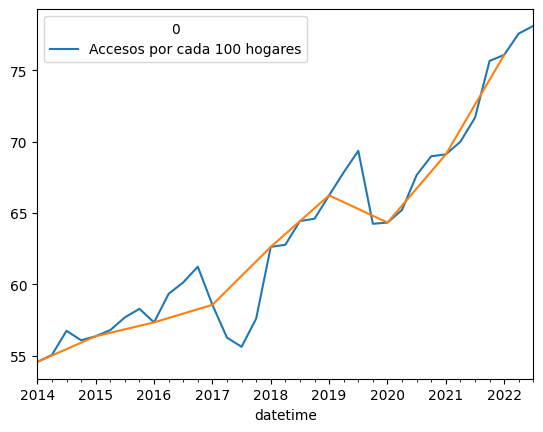

In [55]:
df_provincial_bsas.plot()
df_bsas_anual.plot()

In [45]:
df_bsas_anual = df_provincial_bsas['Accesos por cada 100 hogares'].resample('A').first()

In [48]:
bsas_decompose = sm.tsa.seasonal_decompose(df_bsas_anual)

In [99]:
pgb_bsas = pbg['BUENOS AIRES']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


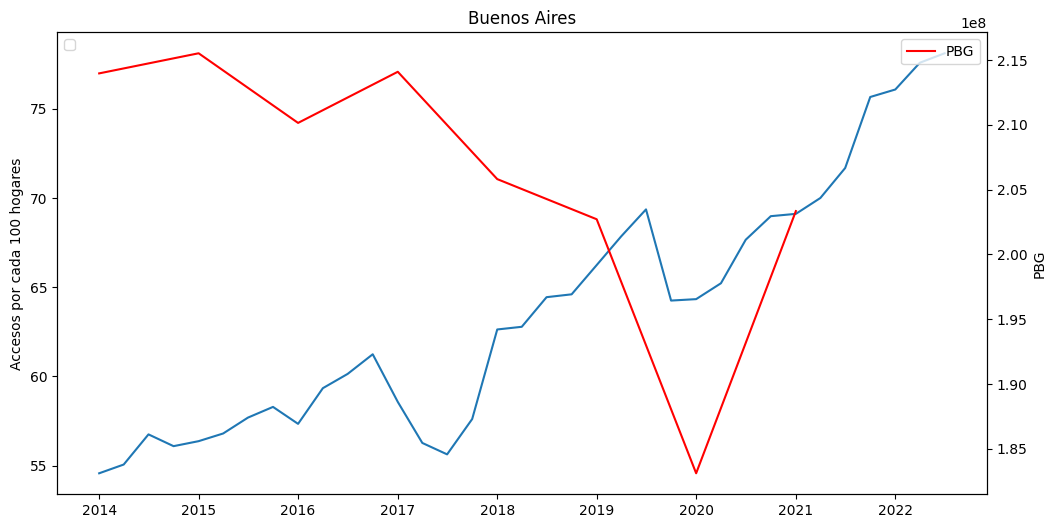

In [108]:
# Ploteamos tanto BUENOS AIRES pbg como BUENOS AIRES 'accesso por cada 100 hogares', con diferente axis Y en un mismo grafico
plt.figure(figsize=(12, 6))
plt.plot(df_provincial_bsas['Accesos por cada 100 hogares'])
plt.legend(loc='upper left')
plt.ylabel('Accesos por cada 100 hogares')
plt.twinx()
plt.plot(pgb_bsas, label='PBG', color='red')
plt.legend(loc='upper right')
plt.ylabel('PBG')
plt.title('Buenos Aires')
plt.show()